In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

df = pd.read_csv("../Final_Data_Collection/Diabetes_Data_1999_2008.csv")
discharge_map = pd.read_csv("../Final_Data_Collection/Discharge_Disposition_Mapping.csv")
admission_type = pd.read_csv("../Final_Data_Collection/Admission_Type_Mapping.csv")

In [2]:
df = df.merge(discharge_map, how='left', on='discharge_disposition_id')
df.rename(columns={'description': 'discharge_disposition_description'}, inplace=True)
df = df.merge(admission_type, how='left', on='admission_type_id')
df.rename(columns={'description': 'admission_type_description'}, inplace=True)


In [4]:
import random
%matplotlib inline

# changing the default figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

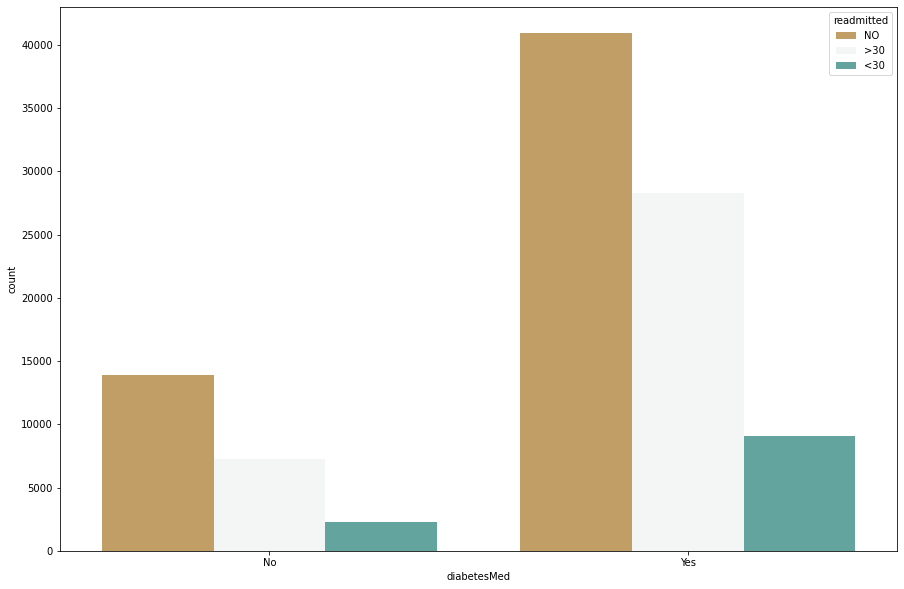

In [85]:

sns.countplot(x="diabetesMed", hue = "readmitted", data=df, palette=random.choice(pallete))

<AxesSubplot:xlabel='insulin', ylabel='count'>

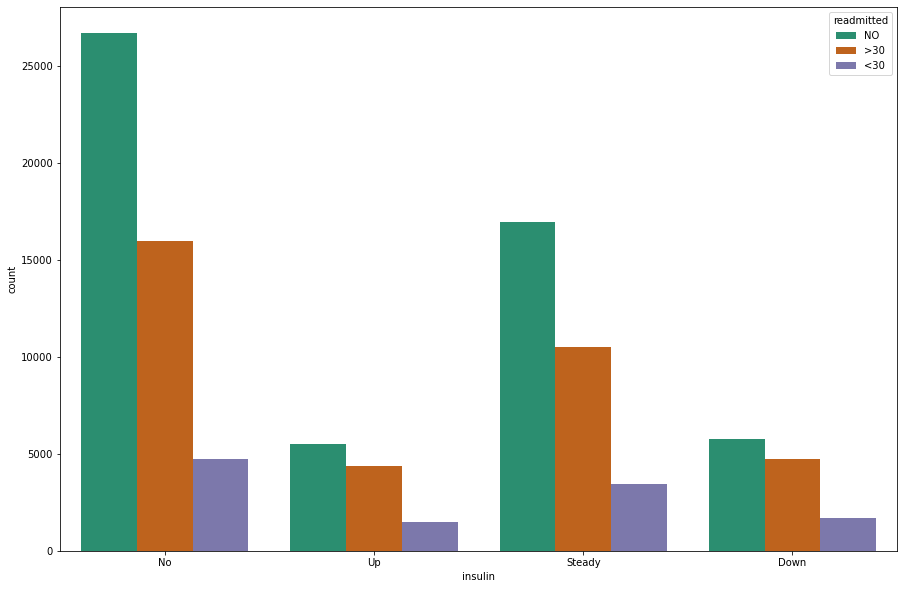

In [86]:
sns.countplot(x="insulin", hue = "readmitted", data=df, palette=random.choice(pallete))

In [87]:
len(df.patient_nbr.unique())

71518

In [5]:
pd.set_option('display.max_columns', None)
print(f"Total Rows: {len(df)}")
df["race"].replace(to_replace='?',value=df["race"].mode()[0], inplace=True)
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)
df.drop(columns=['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'citoglipton', 'examide', 'tolazamide', 'troglitazone', 'miglitol', 'tolbutamide', 'acetohexamide', 'chlorpropamide'], inplace=True)
df = df[df.diag_1.isin(['?']) == False]
df = df[df.diag_2.isin(['?']) == False]
df = df[df.diag_3.isin(['?']) == False]
df = df[df.gender.isin(['Unknown/Invalid']) == False]
print(f"Total Rows: {len(df)}")

Total Rows: 101766
Total Rows: 100241


In [6]:
fields = [0,1,2,3,4,5]
def generate_outcome_variable(row):
    if row['discharge_disposition_id'] == 1:
        if row['readmitted'] == 'NO':
            entry = 0
        elif row['readmitted'] == '>30':
            entry = 1
        else:
            entry = 2
    else:
        if row['readmitted'] == 'NO':
            entry = 3
        elif row['readmitted'] == '>30':
            entry = 4
        else:
            entry = 5

    return entry

df['output'] = df.apply(generate_outcome_variable, axis=1)
df.head()

#sns.pairplot(df, hue='readmitted',palette=random.choice(pallete))

encounter_id  patient_nbr             race  gender      age  \
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   
5         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   
5                 3                  31               6               16   

   number_outpatient  number_emergency  number_inpatient diag_1  diag_2  \
1                  0                 0                 0    276  250.01   
2                  2                 0                 1    648     250   
3                  0                 0                 0      8  250.43   
4                  0                 0                 0    197     157   
5                  0                 0                 0    414     411   

  diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide  \
1    255                 9          None      None        No          No   
2    V27                 6          None      None        No          No   
3    403                 7          None      None        No          No   
4    250                 5          None      None        No          No   
5    250                 9          None      None        No          No   

  nateglinide glimepiride glipizide glyburide pioglitazone rosiglitazone  \
1          No          No        No        No           No            No   
2          No          No    Steady        No           No            No   
3          No          No        No        No           No            No   
4          No          No    Steady        No           No            No   
5          No          No        No        No           No            No   

  acarbose insulin glyburide-metformin change diabetesMed readmitted  \
1       No      Up                  No     Ch         Yes        >30   
2       No      No                  No     No         Yes         NO   
3       No      Up                  No     Ch         Yes         NO   
4       No  Steady                  No     Ch         Yes         NO   
5       No  Steady                  No     No         Yes        >30   

  discharge_disposition_description admission_type_description  output  
1                Discharged to home                  Emergency       1  
2                Discharged to home                  Emergency       0  
3                Discharged to home                  Emergency       0  
4                Discharged to home                  Emergency       0  
5                Discharged to home                     Urgent       1

In [90]:
df.to_csv("../Final_Data_Collection/cleaned_data.csv", index=False)


<AxesSubplot:xlabel='race', ylabel='count'>

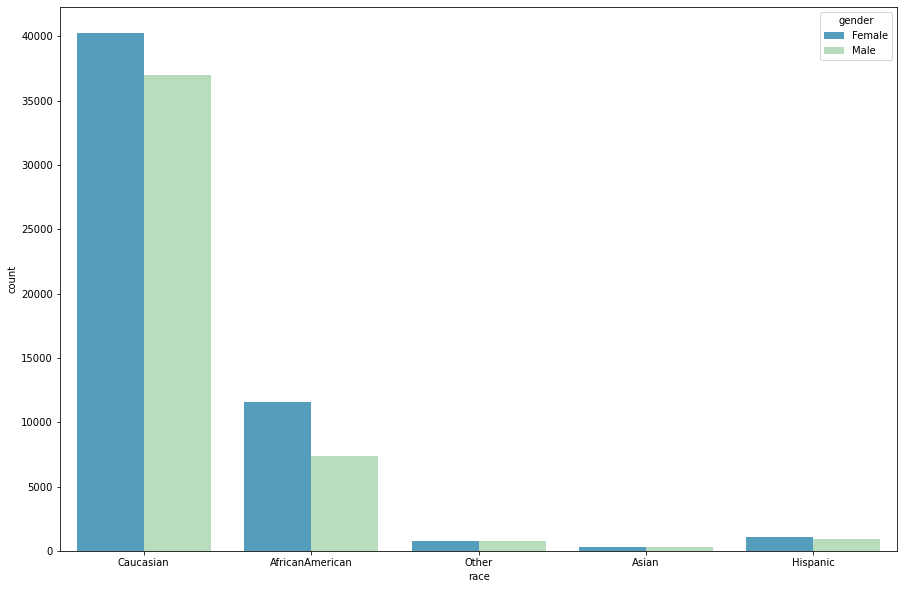

In [91]:
sns.countplot(x="race", hue = "gender", data=df, palette=random.choice(pallete))


In [92]:
px.pie(df, 'race')

In [93]:
px.pie(df, "gender")

In [94]:
px.pie(df, "readmitted")

In [95]:
px.pie(df, "output")

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/var/folders/8y/2qqnx8wn6wvdqd1p8py3xr3w0000gn/T/ipykernel_18910/4287431195.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


A1Cresult                                0
acarbose                                 0
admission_source_id                   6858
admission_type_description               0
admission_type_id                      336
age                                      0
change                                   0
diabetesMed                              0
diag_1                                   0
diag_2                                   0
diag_3                                   0
discharge_disposition_description        0
discharge_disposition_id              9713
encounter_id                             0
gender                                   0
glimepiride                              0
glipizide                                0
glyburide                                0
glyburide-metformin                      0
insulin                                  0
max_glu_serum                            0
metformin                                0
nateglinide                              0
num_lab_pro

<AxesSubplot:xlabel='age', ylabel='count'>

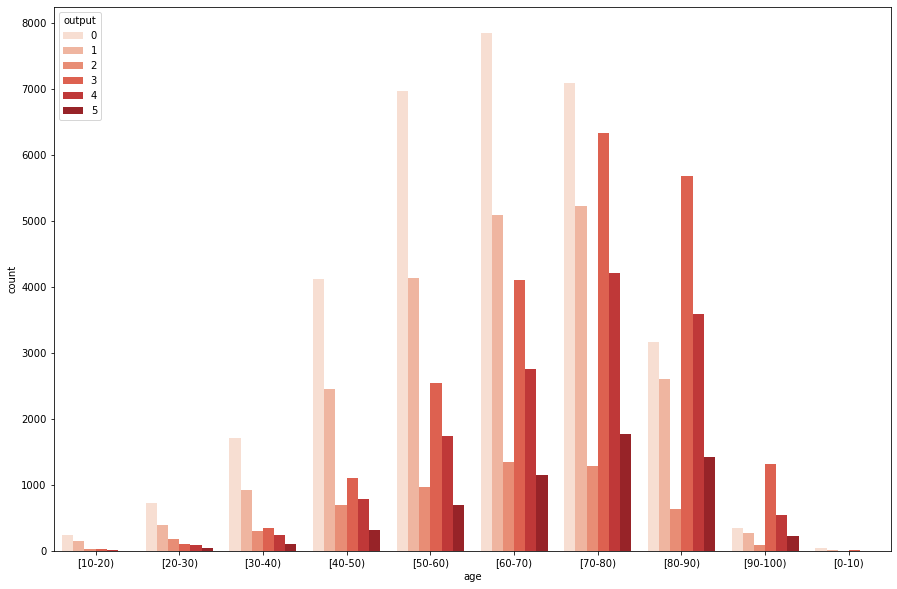

In [8]:
sns.countplot(x="age", hue = "output", data=df, palette=random.choice(pallete))

Categorical Features: 9


<AxesSubplot:>

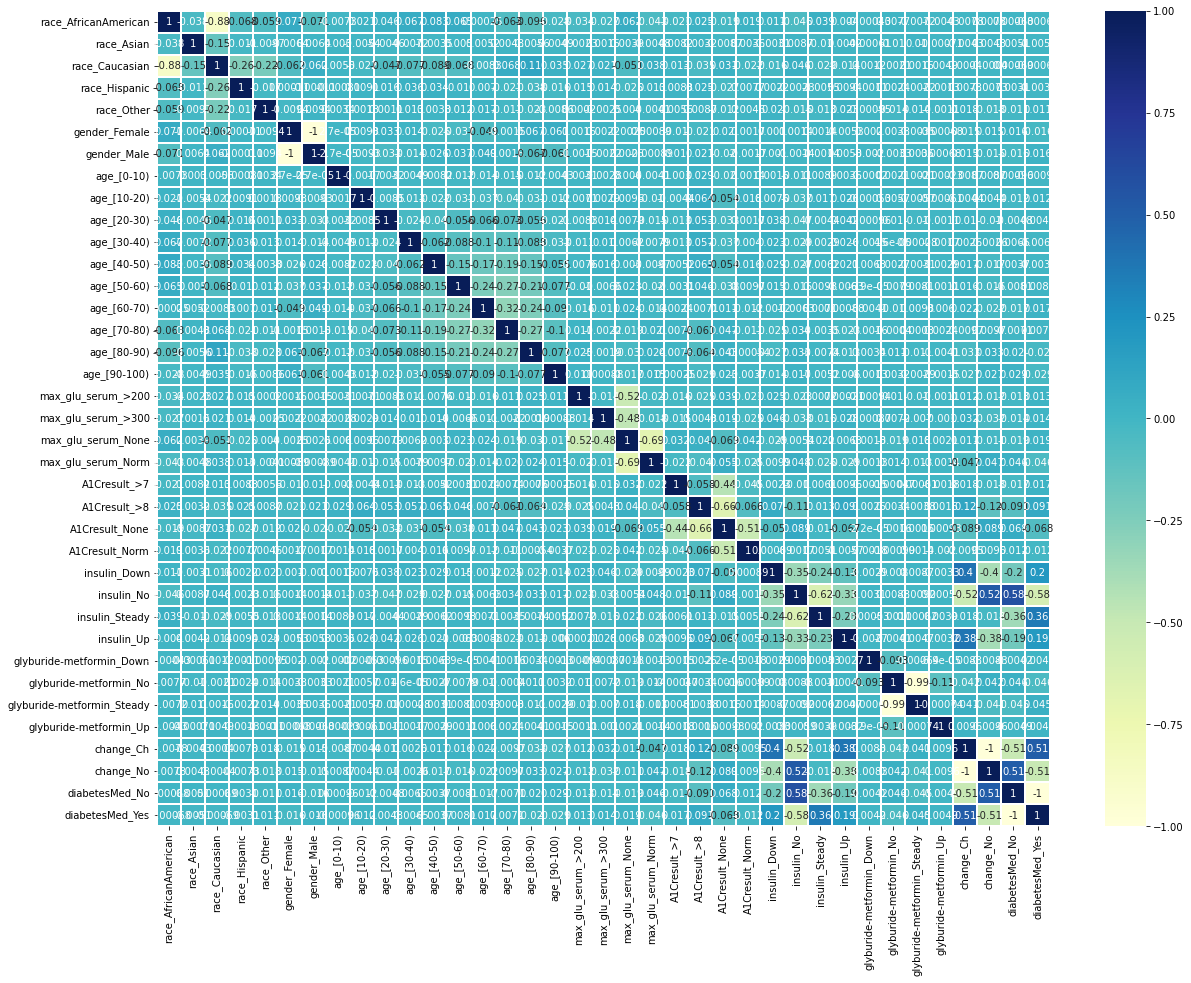

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare
categoricalFeatures = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']
print(f'Categorical Features: {len(categoricalFeatures)}')

# Use one-hot encoding to turn categorical features into numerical ones
dfDummies = pd.get_dummies(df[categoricalFeatures])
plt.figure(figsize=(40,30))
sns.heatmap(dfDummies.corr(),linewidths=.1,cmap="YlGnBu", annot=True)